<a href="https://colab.research.google.com/github/doingajob/FinalYearProject/blob/main/Scaled_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# clone Scaled_YOLOv4
!git clone https://github.com/roboflow-ai/ScaledYOLOv4.git  # clone repo
%cd /content/ScaledYOLOv4/
#checkout the yolov4-large branch
!git checkout yolov4-large

Cloning into 'ScaledYOLOv4'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 338.47 KiB | 26.04 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/ScaledYOLOv4
Branch 'yolov4-large' set up to track remote branch 'yolov4-large' from 'origin'.
Switched to a new branch 'yolov4-large'


In [ ]:
import torch
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
#install mish activation funciton for cuda
%cd /content/
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

/content
Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 17.40 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/mish-cuda
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_c

In [ ]:
!pip install -U PyYAML

     |████████████████████████████████| 645kB 19.3MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/ScaledYOLOv4/

/content/ScaledYOLOv4


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive


/content
Mounted at /content/gdrive


In [ ]:
%cd /
%cd /content/ScaledYOLOv4/

!unzip /mydrive/train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/897_jpg.rf.37168b0fc6ba2b209c1b5ec602a5209d.txt  
  inflating: train/labels/897_jpg.rf.496bc3aa72a71dabd6e4182a52cf261c.txt  
  inflating: train/labels/898_jpg.rf.82b83f07ef8633e8477a5ad950ce47aa.txt  
  inflating: train/labels/898_jpg.rf.ab007aa4c5d4b49a7c7dc12d01448428.txt  
  inflating: train/labels/898_jpg.rf.af4fe64a7ac6867bf86b11a70998004b.txt  
  inflating: train/labels/899_jpg.rf.2f1fb0ff86179b6fd4eddeacc4296a3c.txt  
  inflating: train/labels/899_jpg.rf.45d569a4973865d4f8e63e54c426ad56.txt  
  inflating: train/labels/899_jpg.rf.48395fa672a9cd0138e772f2d71b7a8a.txt  
  inflating: train/labels/899_jpg.rf.618fbeaa81a6a8159d6caec2e0987a42.txt  
  inflating: train/labels/899_jpg.rf.756cbb8064c21e48fc20838a28d76741.txt  
  inflating: train/labels/899_jpg.rf.8537388f755bd0d1ffbd885e30449a40.txt  
  inflating: train/labels/899_jpg.rf.ec222fca8391bcdd2dcfd6e9fb20c8f0.txt  
  inflating: train/labels/899_jpg.rf.

In [ ]:
%cd /content/ScaledYOLOv4/
!mkdir valid
!mkdir test

%cd ./valid
!unzip /mydrive/LaribDBtestdata.zip -d images
!unzip /mydrive/LaribDBlabels.zip  -d labels

%cd ../test
!unzip /mydrive/ColonDBJPGs.zip -d images
!unzip /mydrive/ColonDBLabels.zip -d labels

/content/ScaledYOLOv4
/content/ScaledYOLOv4/valid
Archive:  /mydrive/LaribDBtestdata.zip
  inflating: images/1.tif            
  inflating: images/10.tif           
  inflating: images/100.tif          
  inflating: images/101.tif          
  inflating: images/102.tif          
  inflating: images/103.tif          
  inflating: images/104.tif          
  inflating: images/105.tif          
  inflating: images/106.tif          
  inflating: images/107.tif          
  inflating: images/108.tif          
  inflating: images/109.tif          
  inflating: images/11.tif           
  inflating: images/110.tif          
  inflating: images/111.tif          
  inflating: images/112.tif          
  inflating: images/113.tif          
  inflating: images/114.tif          
  inflating: images/115.tif          
  inflating: images/116.tif          
  inflating: images/117.tif          
  inflating: images/118.tif          
  inflating: images/119.tif          
  inflating: images/12.tif           

In [ ]:
%cd /content/ScaledYOLOv4/

!unzip /mydrive/trial1images.zip -d trial1images
!unzip /mydrive/trial2images.zip -d trial2images
!unzip /mydrive/trial3images.zip -d trial3images
!unzip /mydrive/trial4images.zip -d trial4images
!unzip /mydrive/trial5images.zip -d trial5images


Streaming output truncated to the last 5000 lines.
  inflating: trial3images/904_jpg.rf.4923f6989c16ce199f5d401604cd1f85.jpg  
  inflating: trial3images/904_jpg.rf.5cb5ad5201f4158d579bec5bdf4f66f5.jpg  
  inflating: trial3images/904_jpg.rf.76fbde6893bda4d27f4a0124a9a91291.jpg  
  inflating: trial3images/904_jpg.rf.fcc8653c812017e112c4ef0e2e97e332.jpg  
  inflating: trial3images/906_jpg.rf.86a10eb6266e35b7e493e964592b4109.jpg  
  inflating: trial3images/906_jpg.rf.df4fbc5a148756e9a8665e8e667088e8.jpg  
  inflating: trial3images/906_jpg.rf.fc279ae9b8ef9c4306de5dcd4fbcf2d9.jpg  
  inflating: trial3images/907_jpg.rf.f4e17e70d5945b5283e360e893986f96.jpg  
  inflating: trial3images/908_jpg.rf.37d0e44efdb6cc0319a85ed5f1db5091.jpg  
  inflating: trial3images/908_jpg.rf.384f3067814de8e4224fa91cf32b64c9.jpg  
  inflating: trial3images/908_jpg.rf.bc611fd9a35de162b1b9d103da834def.jpg  
  inflating: trial3images/908_jpg.rf.d6467f14f8872de183644664844938dd.jpg  
  inflating: trial3images/909_jpg.rf.

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/ScaledYOLOv4/models/customyolov4.yaml

# parameters
nc: 1  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [13,17,  31,25,  24,51, 61,45]  # P3/8
  - [48,102,  119,96, 97,189, 217,184]  # P4/16
  - [171,384, 324,451, 616,618, 800,800]  # P5/32

# csp-p5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2
   [-1, 1, BottleneckCSP, [64]],
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 5-P3/8
   [-1, 15, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 7-P4/16
   [-1, 15, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]], # 9-P5/32
   [-1, 7, BottleneckCSP, [1024]],  # 10
  ]

# yolov4-p5 head
# na = len(anchors[0])
head:
  [[-1, 1, SPPCSP, [512]], # 11
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [8, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   [-1, 3, BottleneckCSP2, [256]], # 16 
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [6, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   [-1, 3, BottleneckCSP2, [128]], # 21
   [-1, 1, Conv, [256, 3, 1]],
   [-2, 1, Conv, [256, 3, 2]],
   [[-1, 16], 1, Concat, [1]],  # cat
   [-1, 3, BottleneckCSP2, [256]], # 25
   [-1, 1, Conv, [512, 3, 1]],
   [-2, 1, Conv, [512, 3, 2]],
   [[-1, 11], 1, Concat, [1]],  # cat
   [-1, 3, BottleneckCSP2, [512]], # 29
   [-1, 1, Conv, [1024, 3, 1]],

   [[22,26,30], 1, Detect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]


In [ ]:
# Below we are changing the data configuration for right path to the dataset
%%writetemplate /content/ScaledYOLOv4/data.yaml
train: /mydrive/but3.txt
val: /mydrive/trial3.txt
test: /mydrive/trial1.txt

nc: 1
names: ['Polyp']

# Train Custom Scaled-YOLOv4 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights.
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train scaled-YOLOv4 on custom data for 100 epochs
# time its performance  
%%time
%cd /content/ScaledYOLOv4/
!python train.py --img 512 --batch 16 --epochs 15 --data './data.yaml' --cfg ./models/customyolov4.yaml --weights '/mydrive/yolov4/trial3best.pt' --name trial3 --cache

/content/ScaledYOLOv4
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/customyolov4.yaml', data='./data.yaml', device='', epochs=15, evolve=False, global_rank=-1, hyp='data/hyp.finetune.yaml', img_size=[512, 512], local_rank=-1, logdir='runs/', multi_scale=False, name='trial3', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='/mydrive/yolov4/trial3best.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2021-04-30 20:00:35.069788: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h

# Evaluate Custom Scaled-YOLOv4 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
#from utils.general import plot_results  # plot results.txt as results.png
from IPython.display import Image, display
display(Image('/content/ScaledYOLOv4/runs/exp0_yolov4-csp-results/results.png'))  # view results.png

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/ScaledYOLOv4/
!python test.py --weights '/mydrive/yolov4/trial1best.pt' --data '/data/coco.yaml' --verbose --conf 0.4 --task val --save-txt

/content/ScaledYOLOv4
Namespace(augment=False, batch_size=32, conf_thres=0.4, data='./data/coco.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=True, save_txt=True, single_cls=False, task='val', verbose=True, weights=['/mydrive/yolov4/trial1best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... Model Summary: 331 layers, 7.0227e+07 parameters, 6.81919e+07 gradients
Traceback (most recent call last):
  File "/content/ScaledYOLOv4/utils/datasets.py", line 308, in __init__
    raise Exception('%s does not exist' % p)
Exception: ../coco/val2017.txt does not exist

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test.py", line 278, in <module>
    opt.verbose)
  File "test.py", line 77, in test
    hyp=None, augment=False, cache=False, pad=0.5, rect=True)[0]
  File "/content/ScaledYOLOv4/utils/datasets.py", line 60, in create_dataloader
    pad=pad)
  

In [ ]:
%cd /content/ScaledYOLOv4/
!python detect.py --weights '/mydrive/yolov4/trial5best.pt' --source '/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB' --img 512 --conf 0.65 --save-txt

/content/ScaledYOLOv4
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.65, device='', img_size=512, iou_thres=0.5, output='inference/output', save_txt=True, source='/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB', update=False, view_img=False, weights=['/mydrive/yolov4/trial5best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... Model Summary: 331 layers, 7.0227e+07 parameters, 6.81919e+07 gradients
image 1/196 /content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB/1.tif: 512x512 1 Polyps, Done. (0.048s)
image 2/196 /content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB/10.tif: 512x512 1 Polyps, Done. (0.041s)
image 3/196 /content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB/100.tif: 512x512 Done. (0.040s)
image 4/196 /content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/ETIS-LaribPolypDB/101.tif: 512x512 Done. (0.040s)
image 5/196 /content/gdrive/M

In [ ]:
!mkdir /mydrive/predictions1
!mkdir /mydrive/predictions2
!mkdir /mydrive/predictions3
!mkdir /mydrive/predictions4
!mkdir /mydrive/predictions5

mkdir: cannot create directory ‘/mydrive/predictions2’: File exists
mkdir: cannot create directory ‘/mydrive/predictions3’: File exists
mkdir: cannot create directory ‘/mydrive/predictions4’: File exists
mkdir: cannot create directory ‘/mydrive/predictions5’: File exists


In [ ]:
!mkdir /mydrive/enhancedpredictions2
!cp ./inference/output/*.txt /mydrive/enhancedpredictions2

In [ ]:
import glob
print(len(glob.glob('/mydrive/enhancedpredictions2/*')))

135


/content/ScaledYOLOv4/inference/output
/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p1.tif


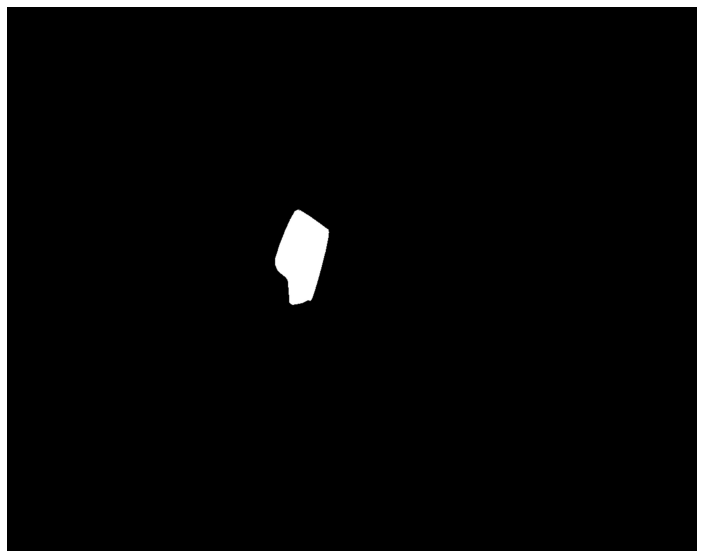



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p10.tif


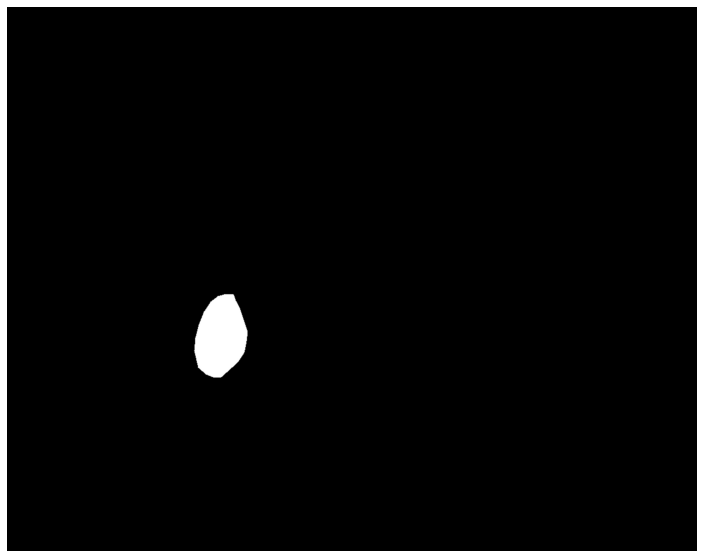



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p100.tif


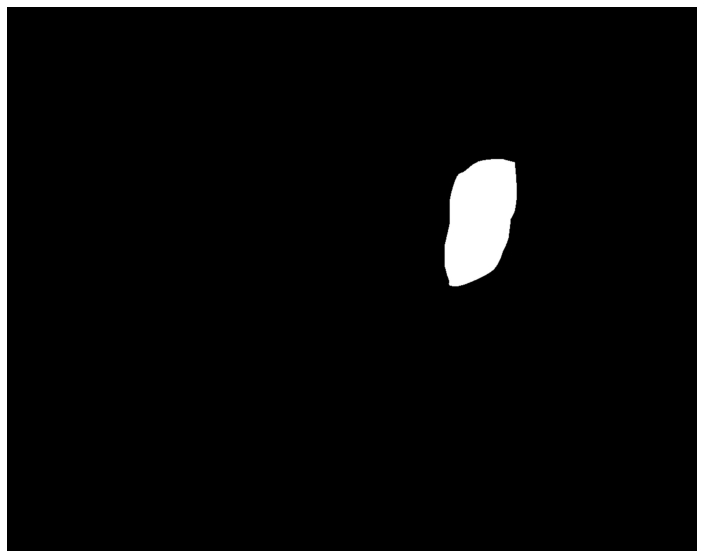



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p101.tif


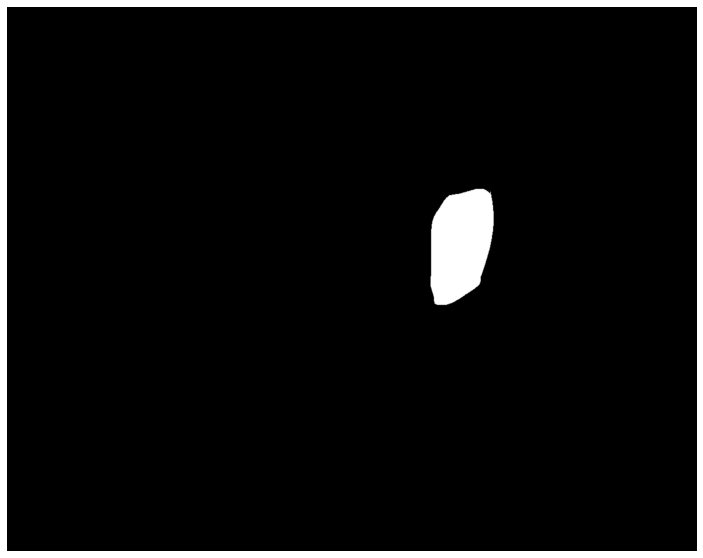



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p102.tif


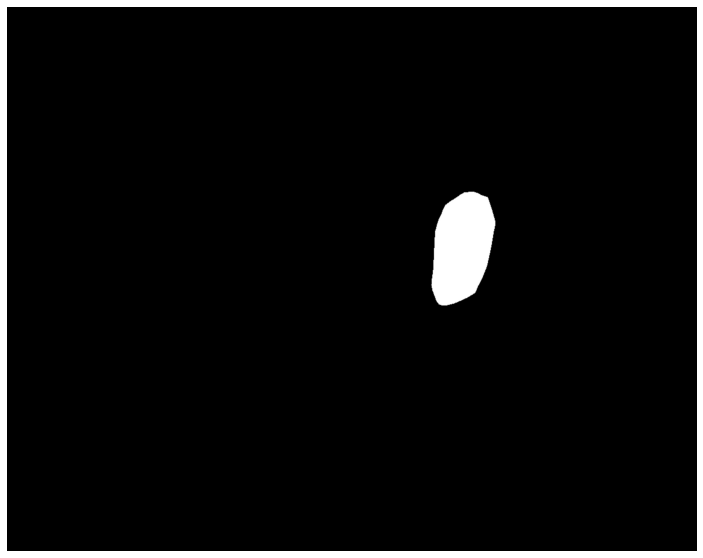



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p103.tif


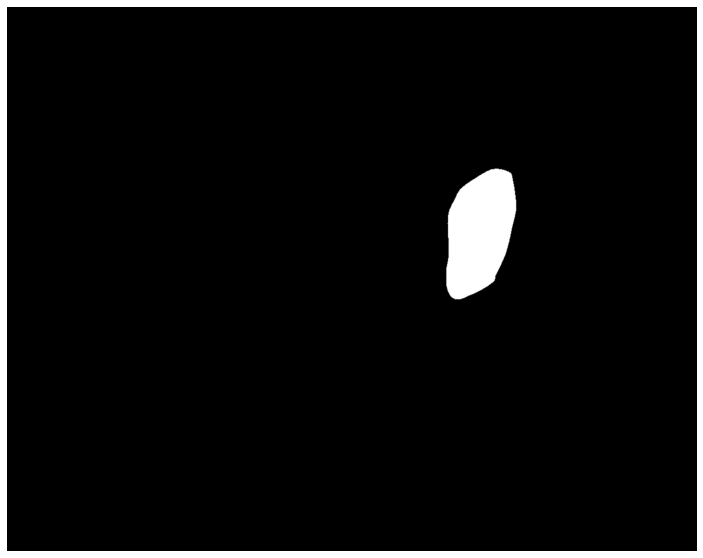



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p104.tif


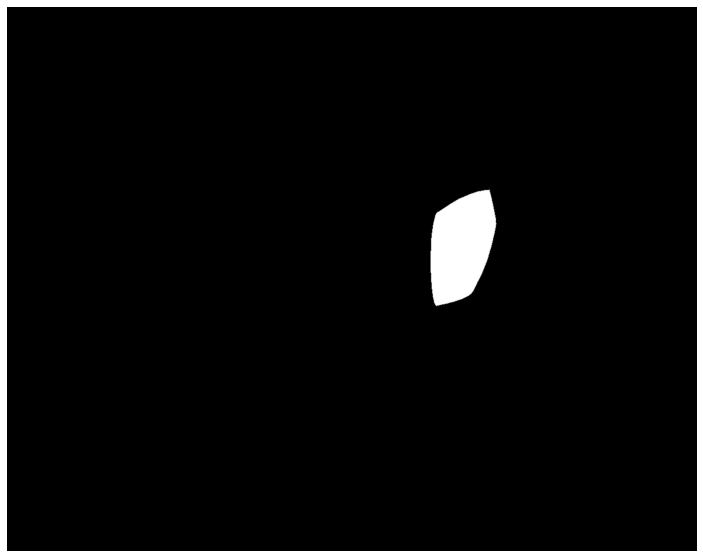



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p105.tif


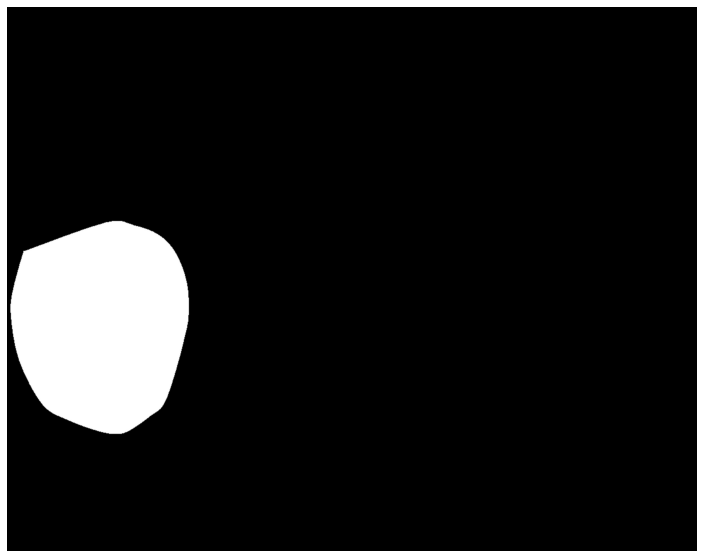



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p106.tif


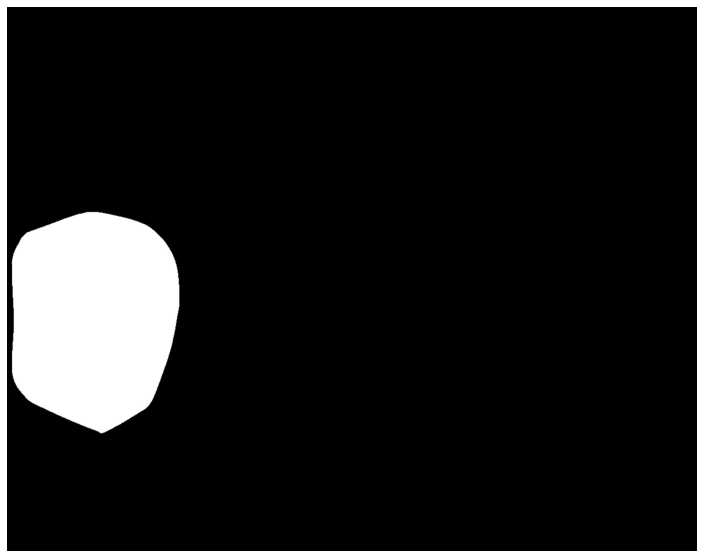



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p107.tif


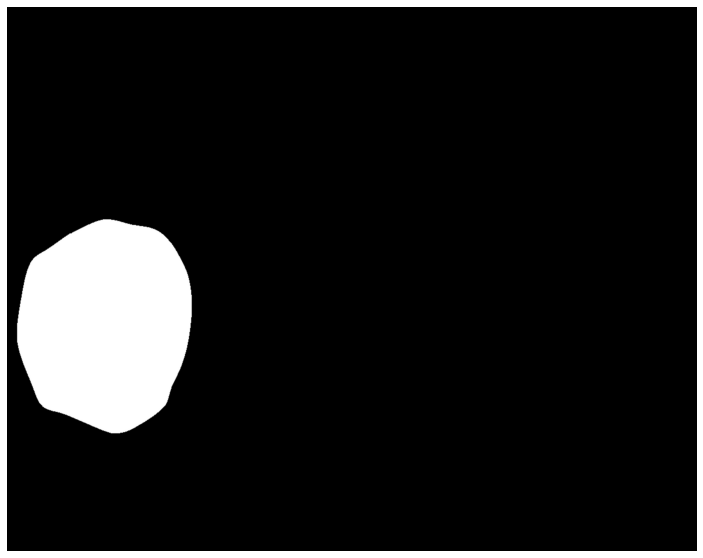



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p108.tif


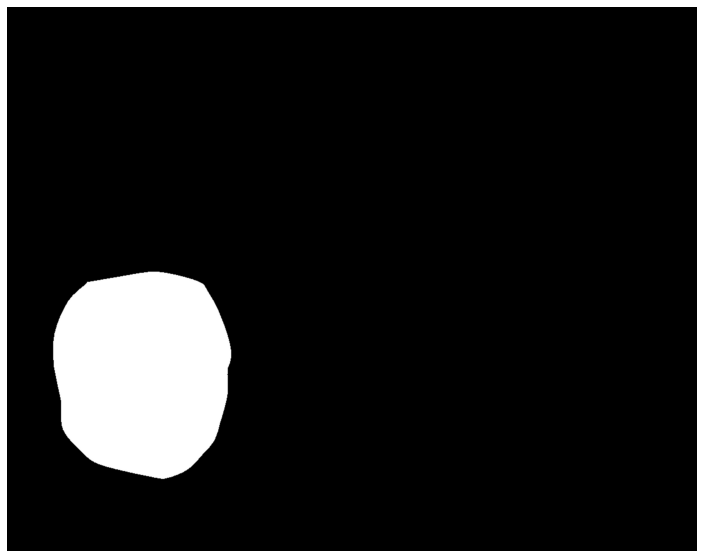



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p109.tif


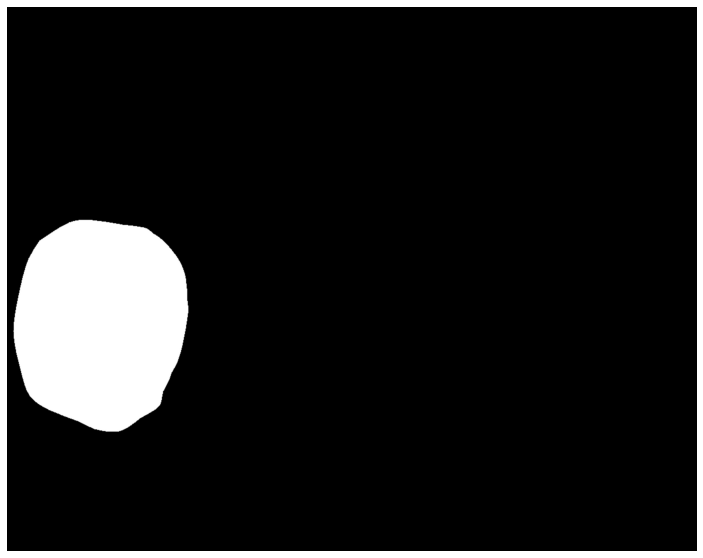



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p11.tif


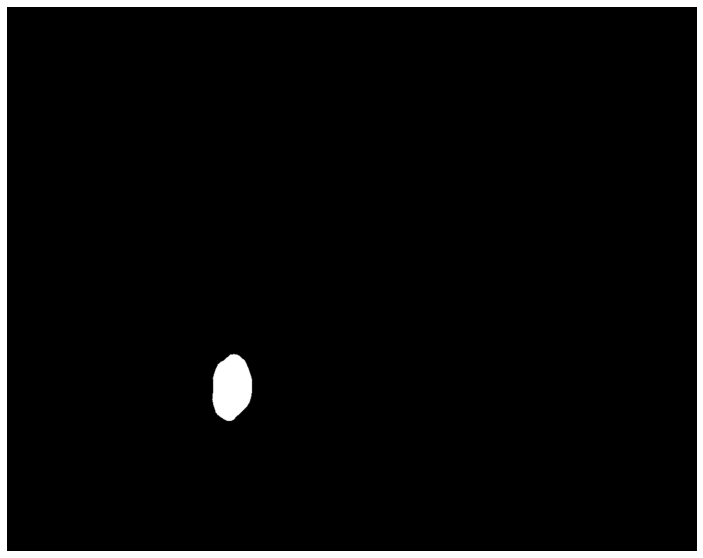



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p110.tif


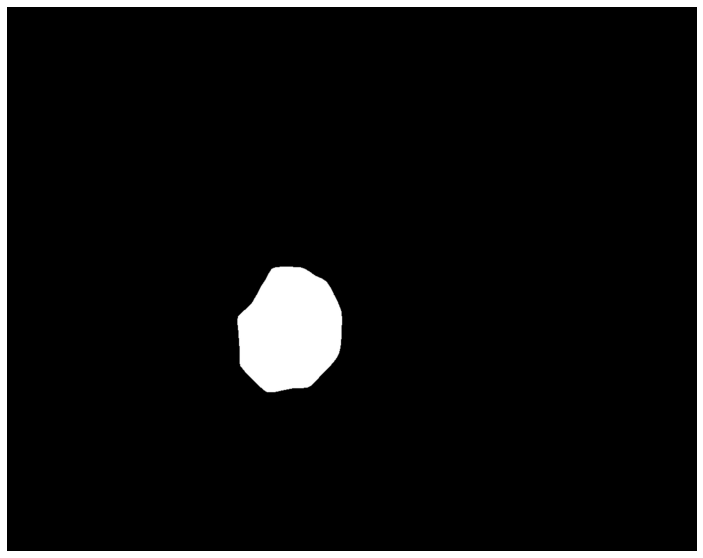



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p111.tif


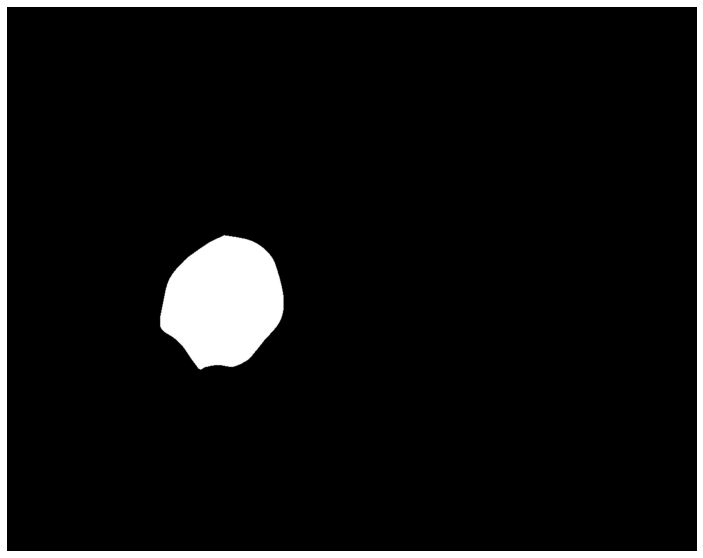



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p112.tif


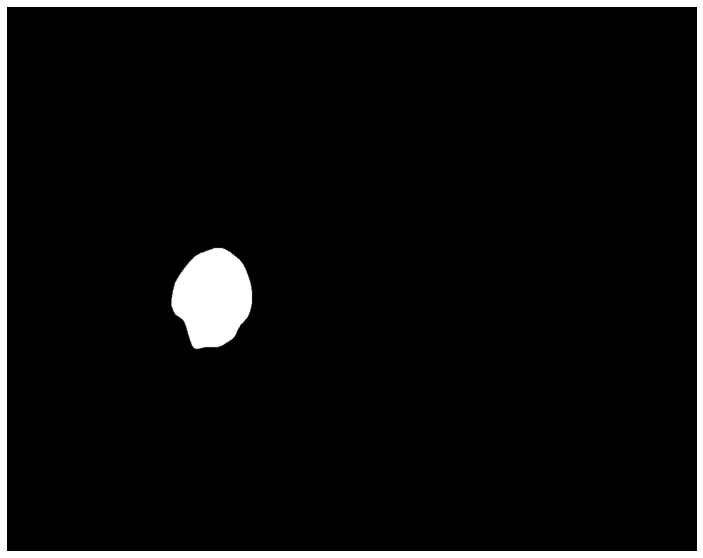



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p113.tif


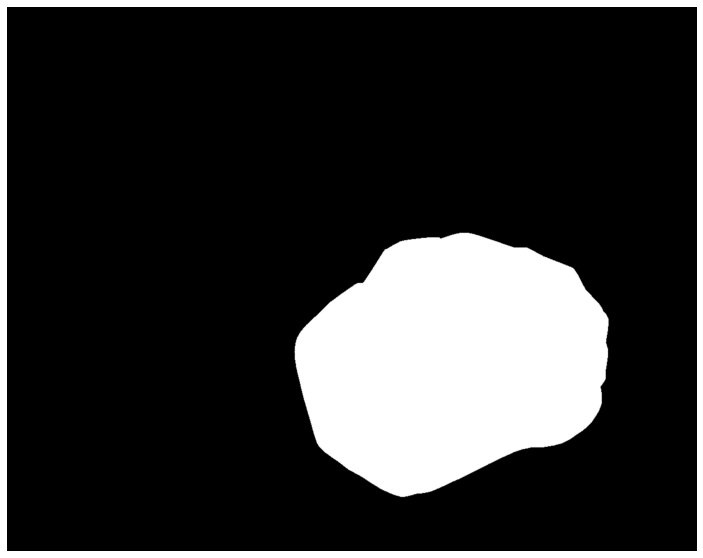



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p114.tif


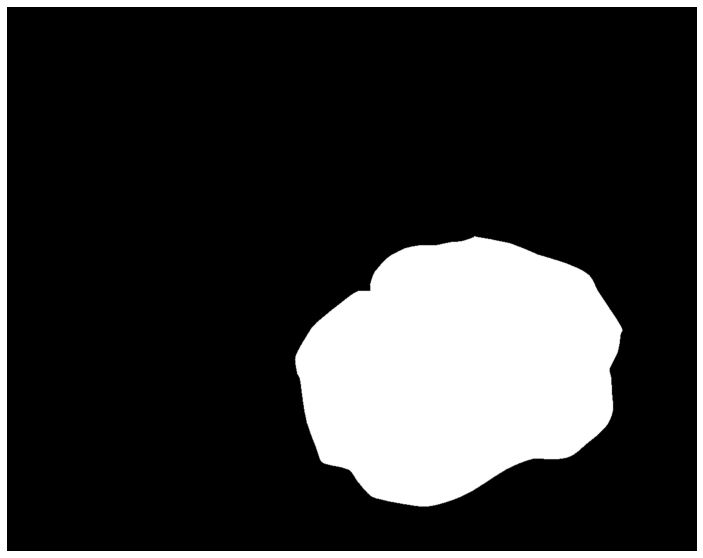



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p115.tif


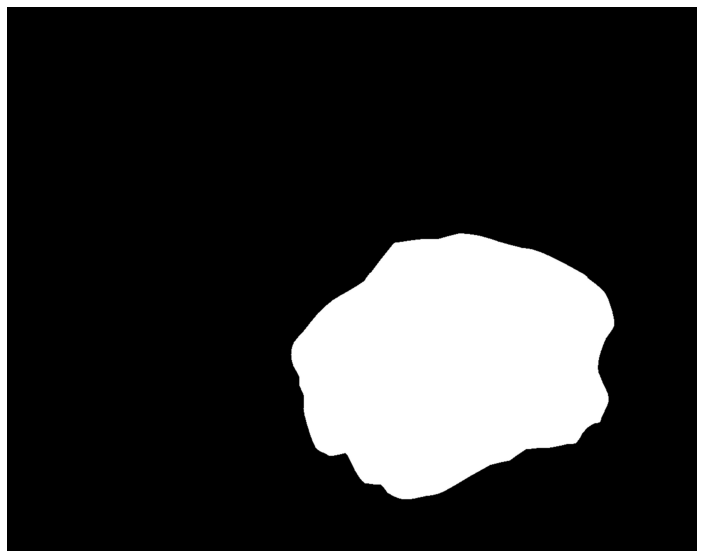



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p116.tif


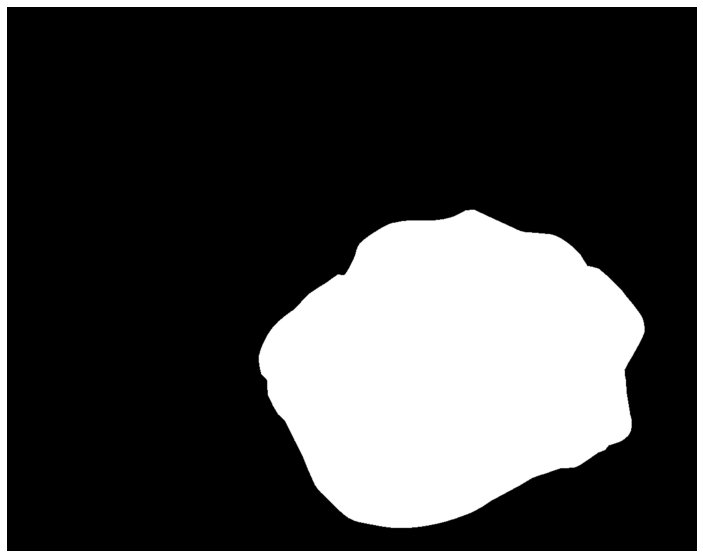



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p117.tif


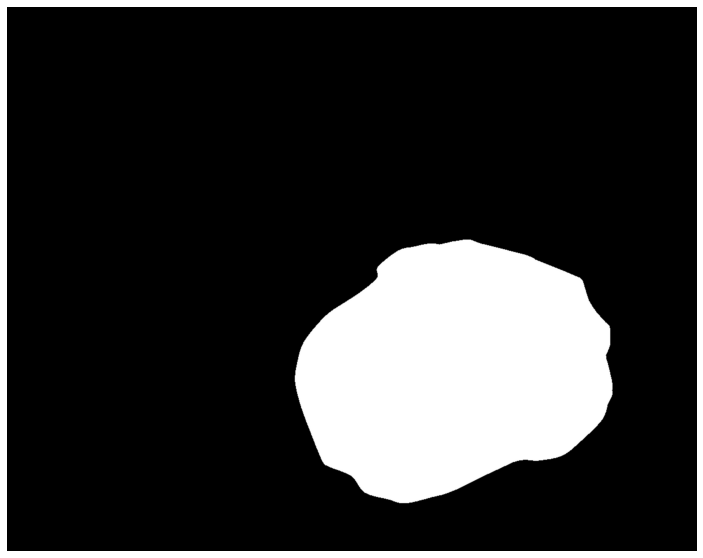



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p118.tif


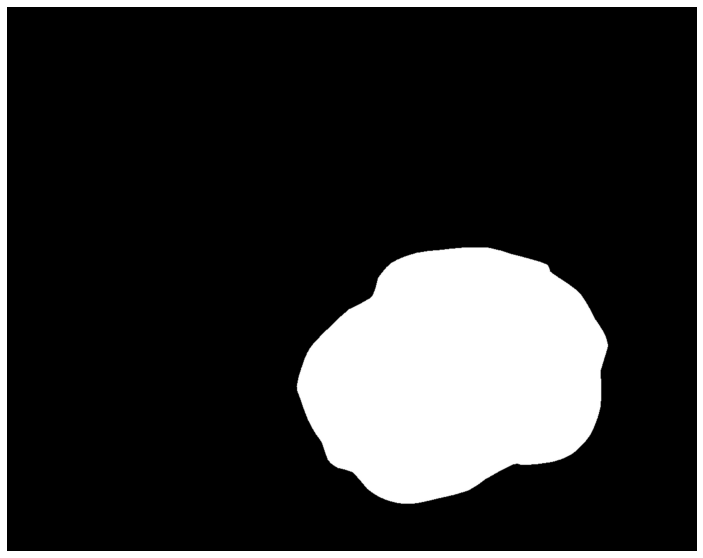



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p119.tif


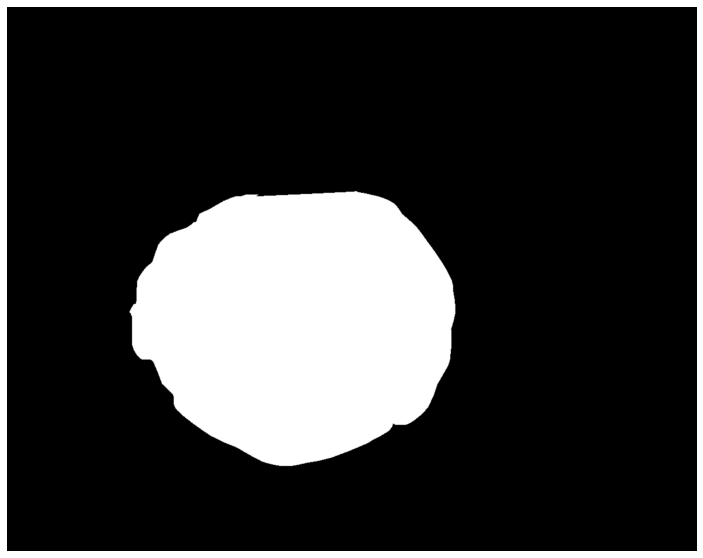



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p12.tif


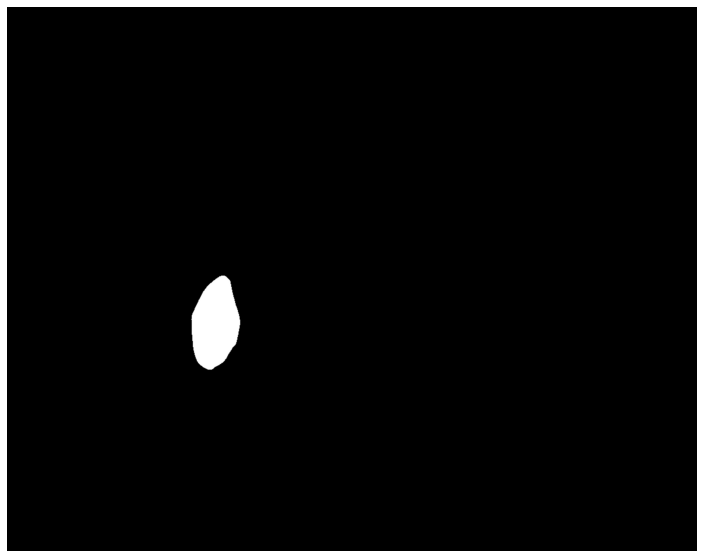



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p120.tif


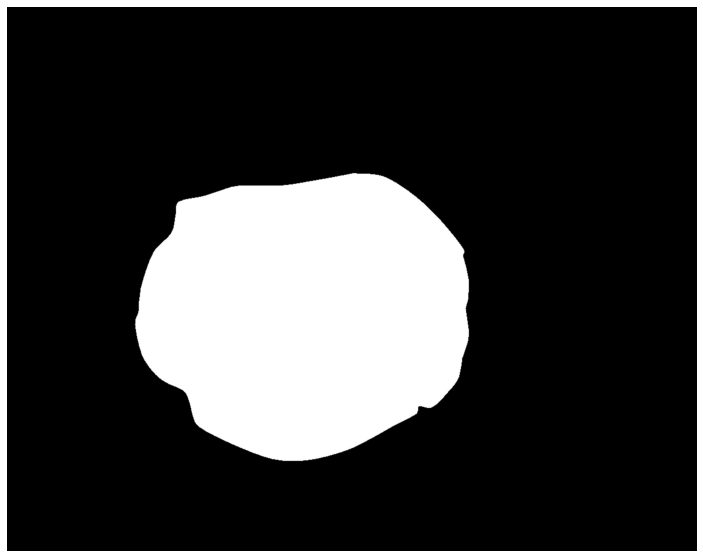



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p121.tif


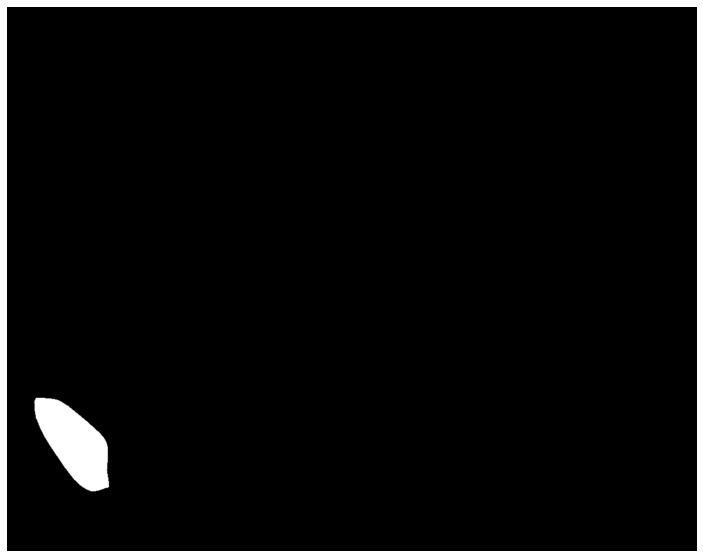



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p122.tif


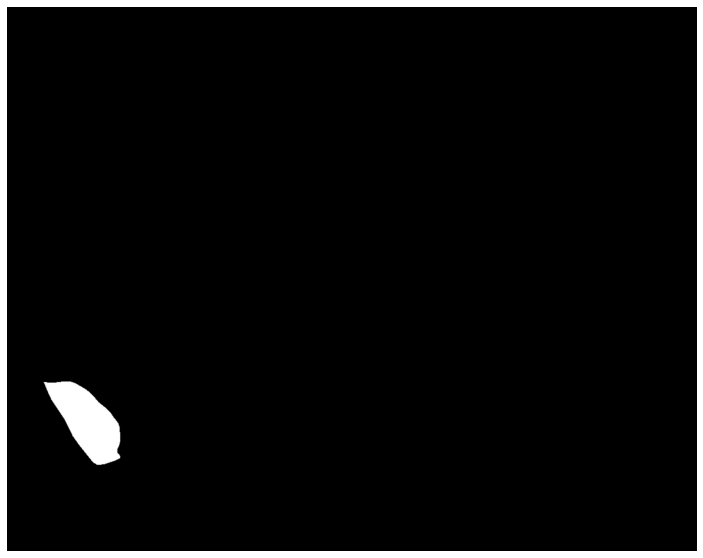



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p123.tif


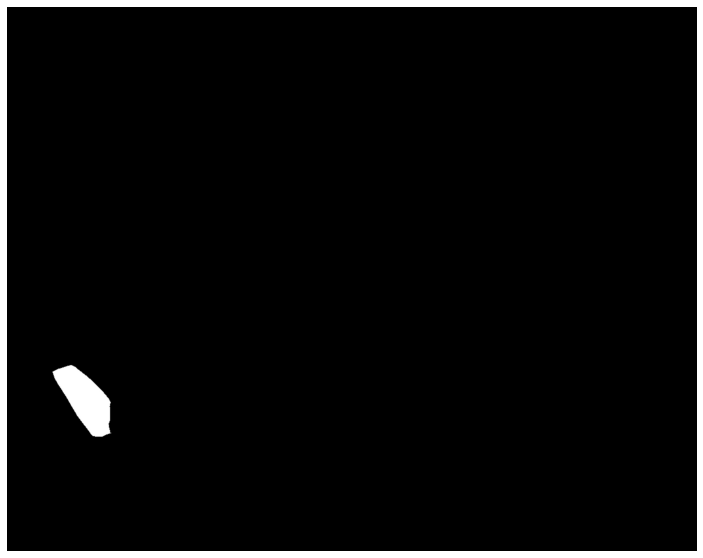



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p124.tif


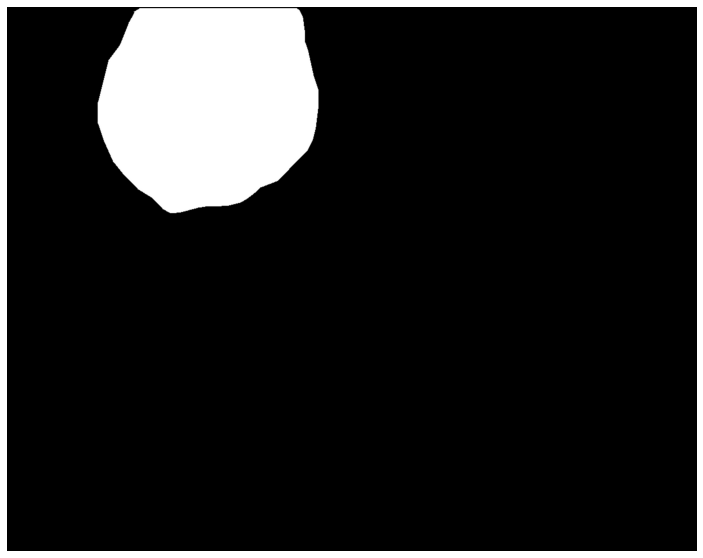



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p125.tif


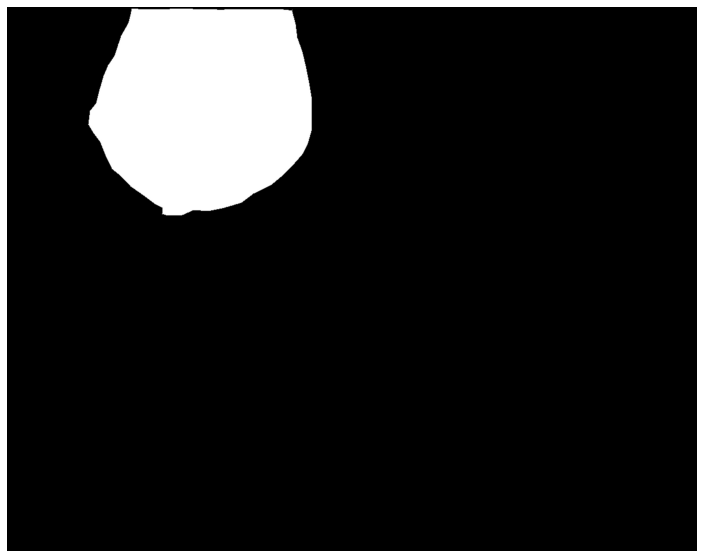



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p126.tif


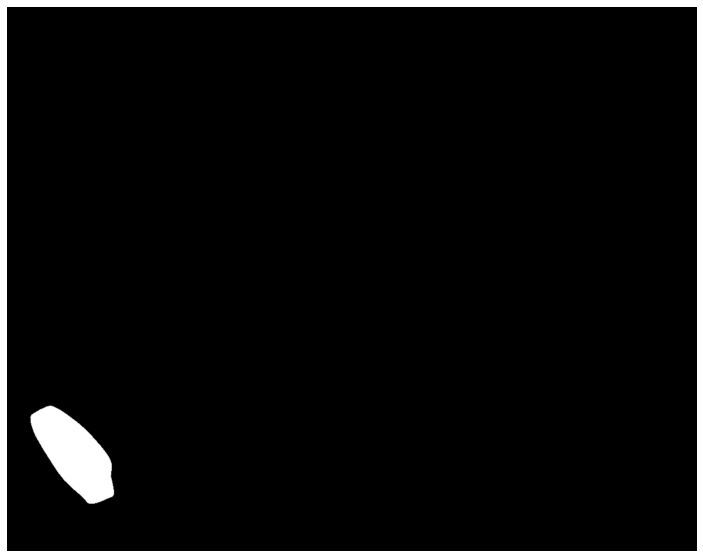



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p127.tif


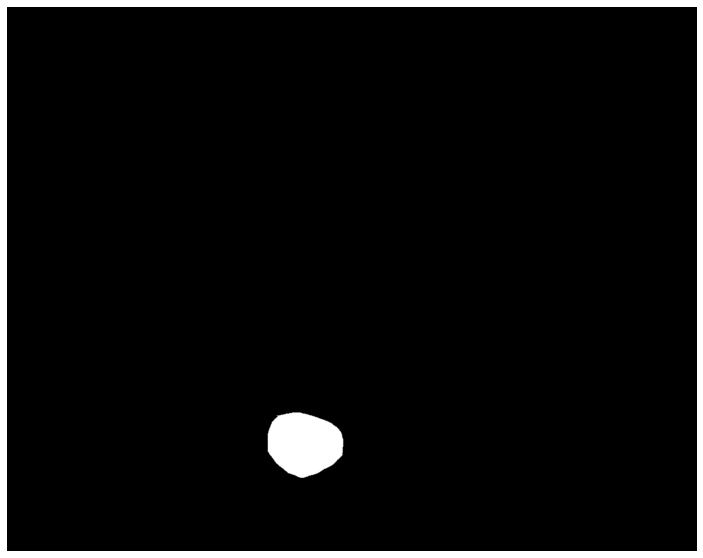



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p128.tif


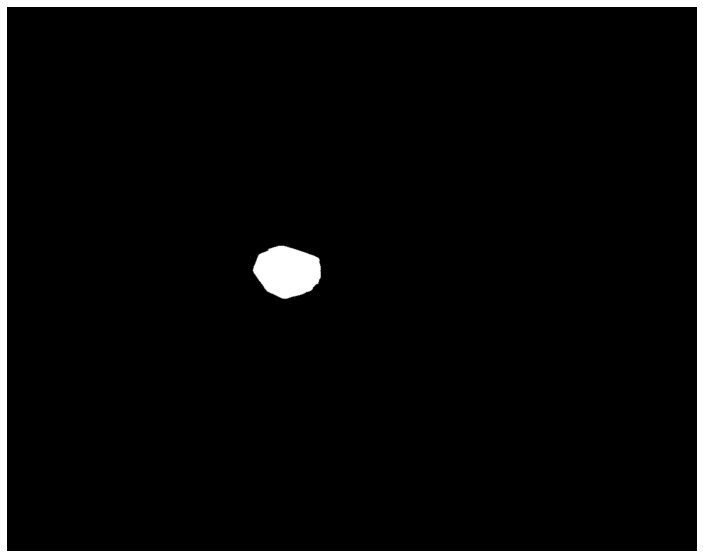



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p129.tif


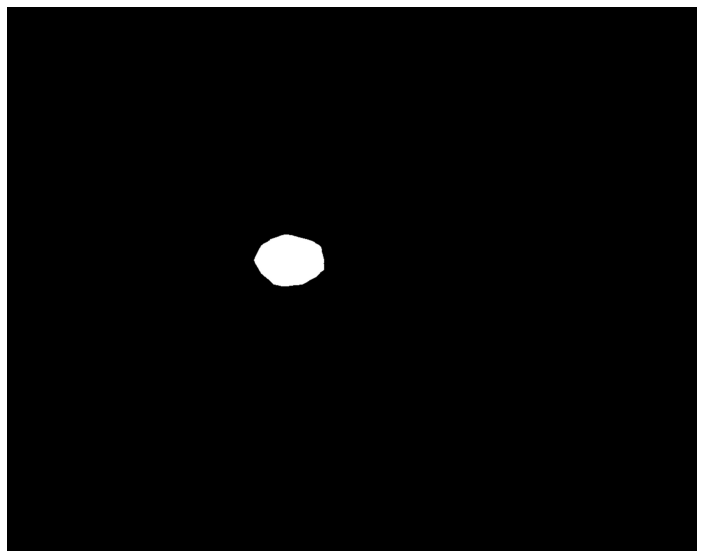



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p13.tif


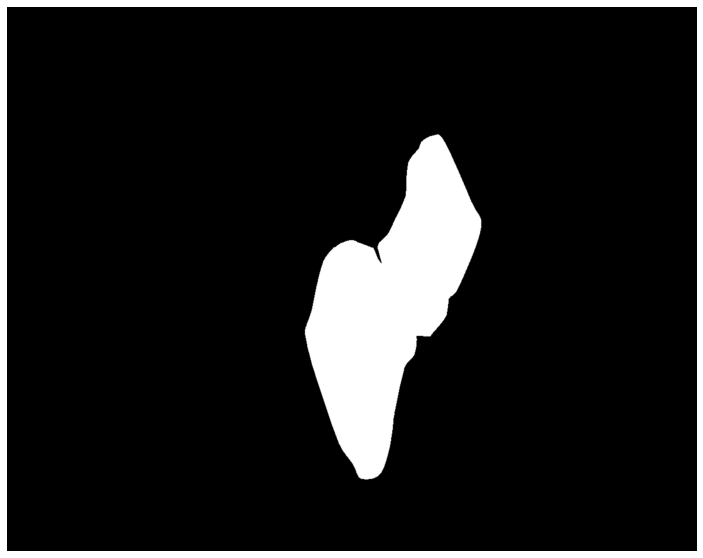



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p130.tif


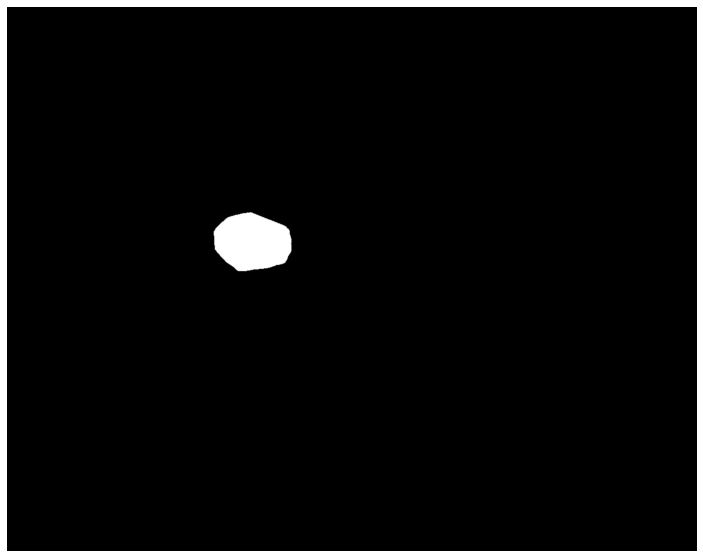



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p131.tif


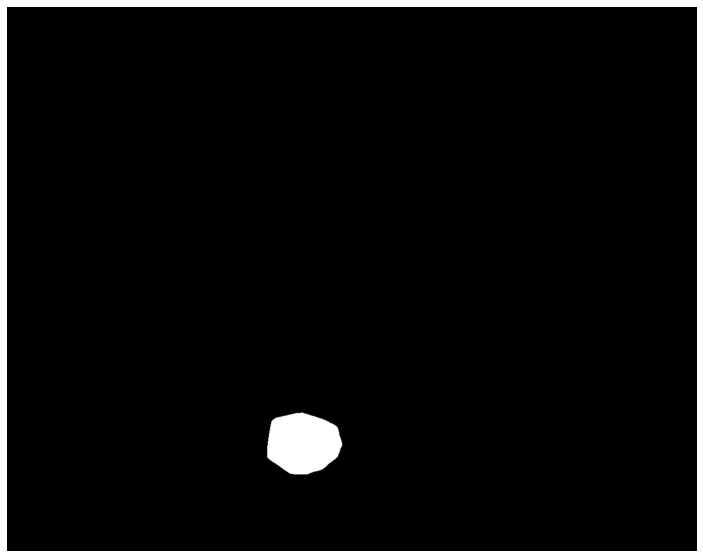



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p132.tif


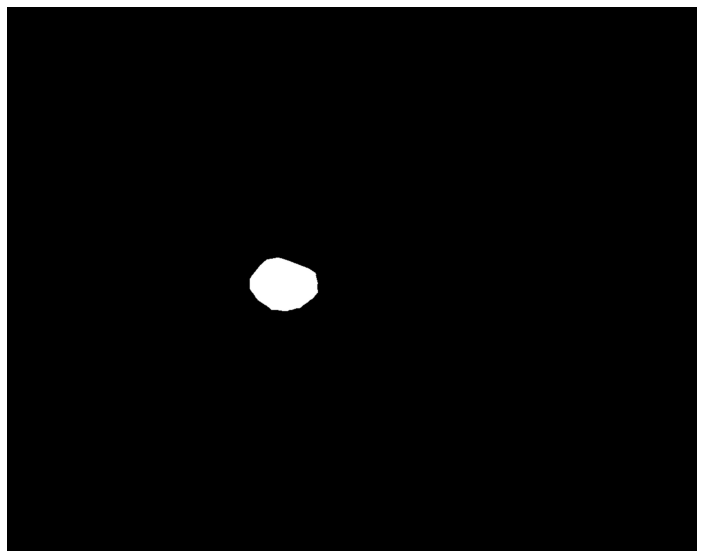



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p133.tif


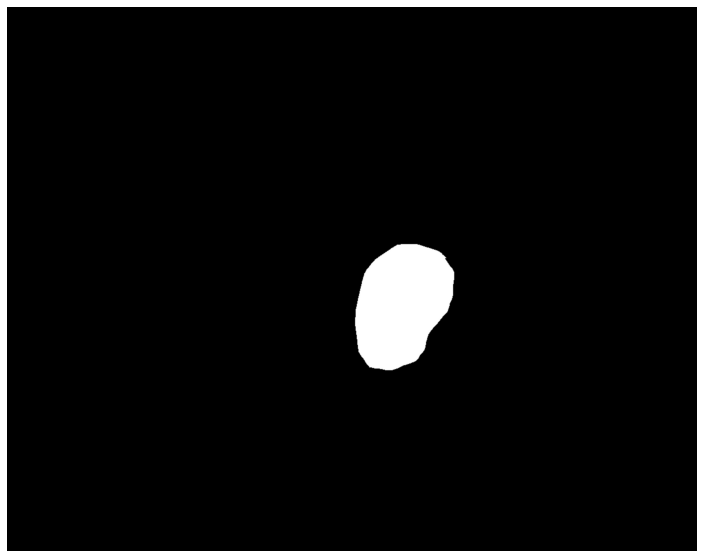



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p134.tif


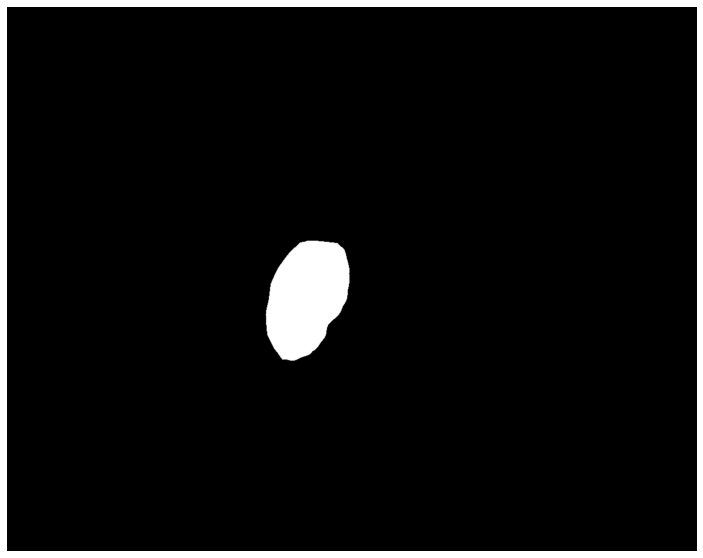



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p135.tif


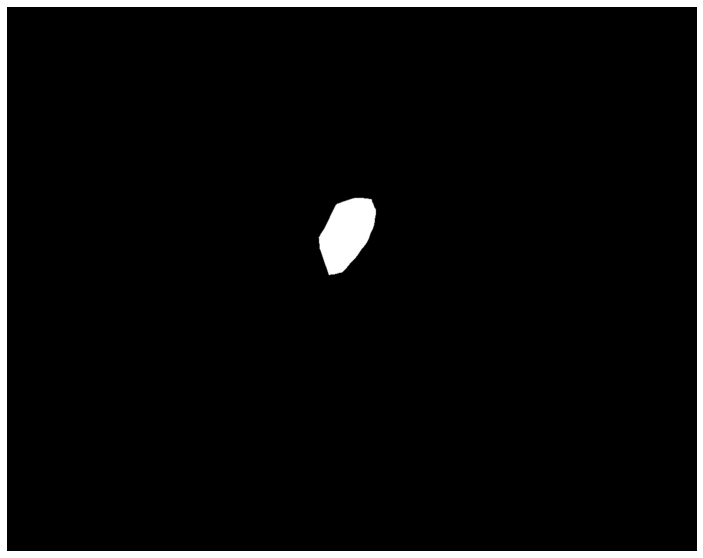



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p136.tif


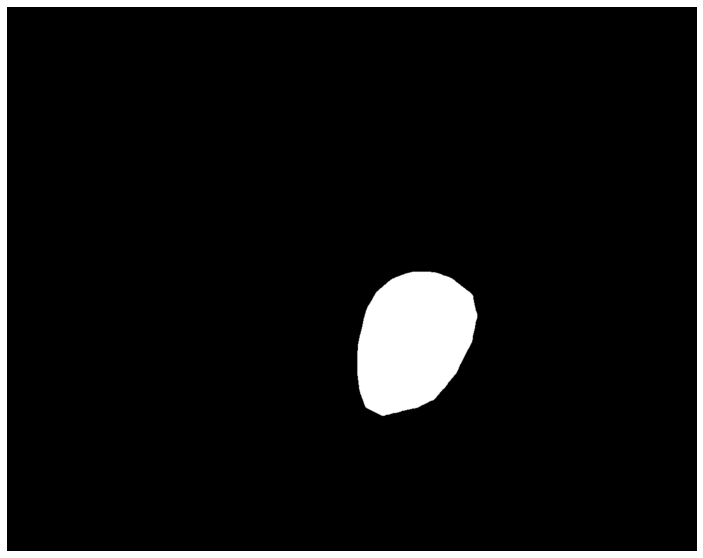



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p137.tif


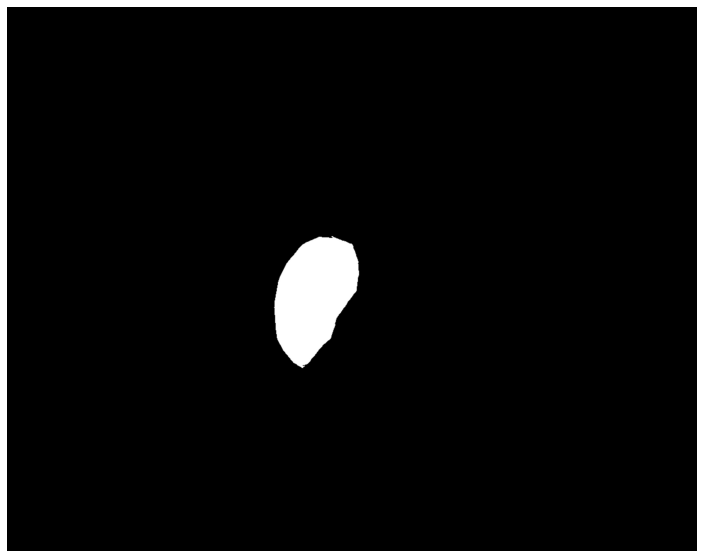



/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p138.tif


KeyboardInterrupt: ignored

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

%cd /content/ScaledYOLOv4/inference/output/

import glob
from IPython.display import Image, display


for imageName in sorted(glob.glob('/content/gdrive/MyDrive/Datasets/ETIS-LaribPolypDB/Ground Truth/p1*')): #assuming JPG
    print(imageName)
    imShow(imageName)
    print("\n")


/content/ScaledYOLOv4/inference/output
57.tif


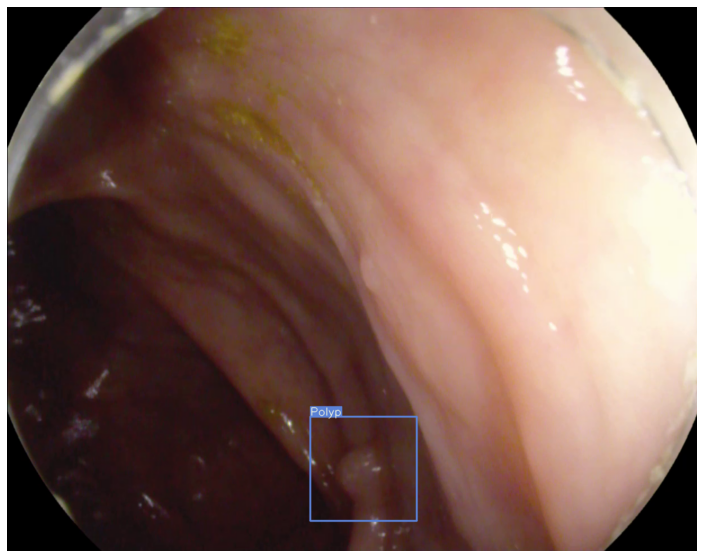

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

%cd /content/ScaledYOLOv4/inference/output/

import glob
from IPython.display import Image, display


for imageName in sorted(glob.glob('*.tif')): #assuming JPG
    print(imageName)
    imShow(imageName)
    print("\n")


In [ ]:
!mkdir /mydrive/predictions4

In [ ]:
!cp /content/ScaledYOLOv4/inference/output/*.txt /mydrive/predictions4

In [ ]:
!rm /mydrive/predictions/*
!cp /content/ScaledYOLOv4/inference/output/*.txt /mydrive/predictions

In [ ]:
print(len(glob.glob('/content/ScaledYOLOv4/inference/output/*.txt')))

152


# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
%cd /content/ScaledYOLOv4/
!cp /content/ScaledYOLOv4/runs/exp0_trial1/weights/best_trial1.pt /mydrive/yolov4

/content/ScaledYOLOv4


## Congrats!

Hope you enjoyed this!

--Team [Roboflow](https://roboflow.ai)